# Рубежный контроль №1 
## Рысьева Елизавета Антоновна 
### Вариант 15 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
df = pd.read_csv('rest.csv')

## Получим общую информацию о датасете.

In [3]:
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          34417 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

In [5]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing(df)

,Total,Percent
business_phone_number,36938,68.437923
Fire Prevention Districts,19646,36.399681
Analysis Neighborhoods,19594,36.303337
Supervisor Districts,19594,36.303337
Police Districts,19594,36.303337
Neighborhoods (old),19594,36.303337
Zip Codes,19576,36.269987
business_latitude,19556,36.232931
business_longitude,19556,36.232931
business_location,19556,36.232931


### Выясним в каких типах данных присутствуют пропуски 

In [6]:
total_count = df.shape[0]

In [7]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt =='int64') :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_latitude. Тип данных float64. Количество пустых значений 19556, 36.23%.
Колонка business_longitude. Тип данных float64. Количество пустых значений 19556, 36.23%.
Колонка business_phone_number. Тип данных float64. Количество пустых значений 36938, 68.44%.
Колонка inspection_score. Тип данных float64. Количество пустых значений 13610, 25.22%.
Колонка Neighborhoods (old). Тип данных float64. Количество пустых значений 19594, 36.3%.
Колонка Police Districts. Тип данных float64. Количество пустых значений 19594, 36.3%.
Колонка Supervisor Districts. Тип данных float64. Количество пустых значений 19594, 36.3%.
Колонка Fire Prevention Districts. Тип данных float64. Количество пустых значений 19646, 36.4%.
Колонка Zip Codes. Тип данных float64. Количество пустых значений 19576, 36.27%.
Колонка Analysis Neighborhoods. Тип данных float64. Количество пустых значений 19594, 36.3%.


In [8]:
df_num = df[num_cols]
df_num

,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,NaN,NaN,1.415043e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.415724e+10,96.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.415488e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
53968,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN
53969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53970,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN
53971,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN


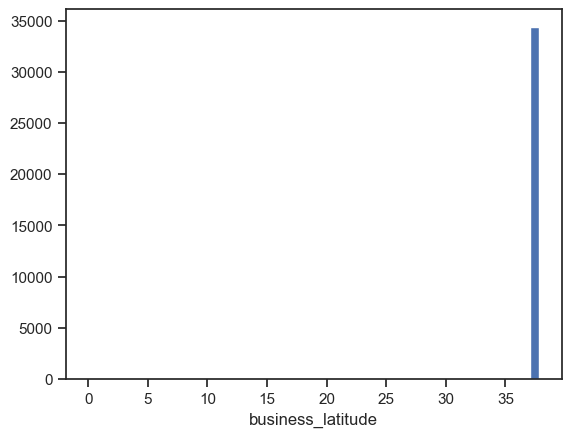

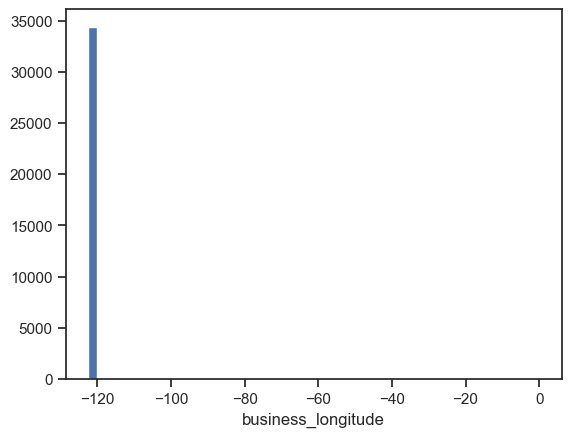

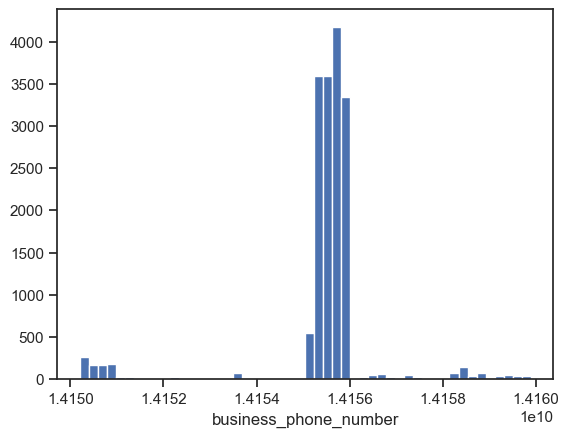

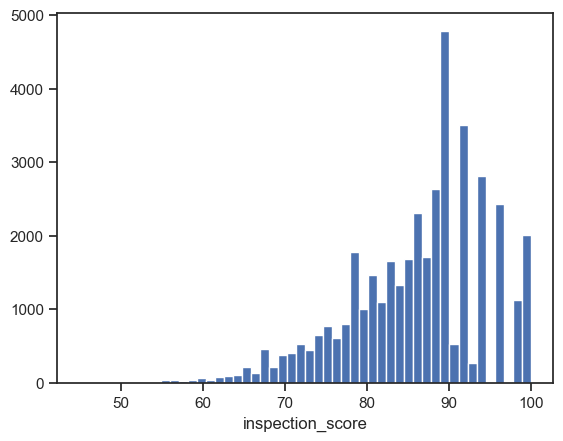

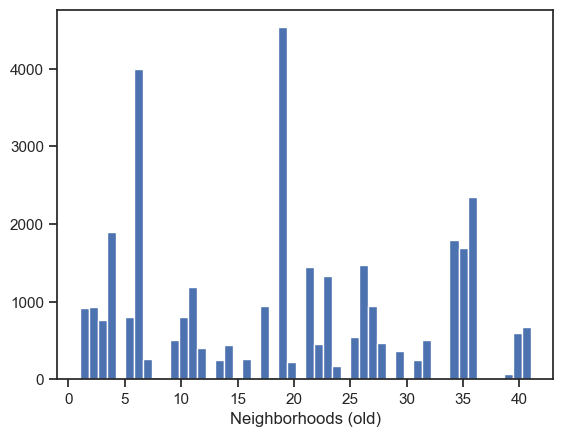

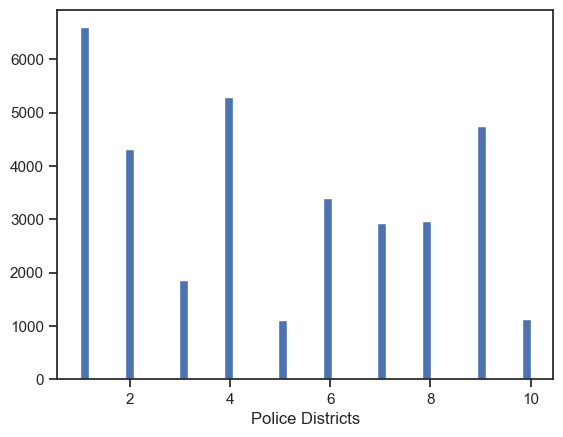

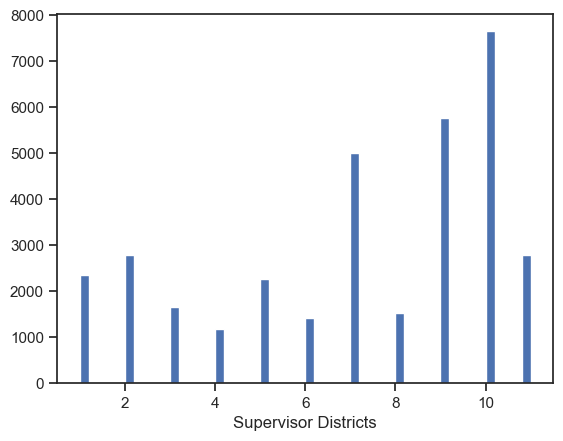

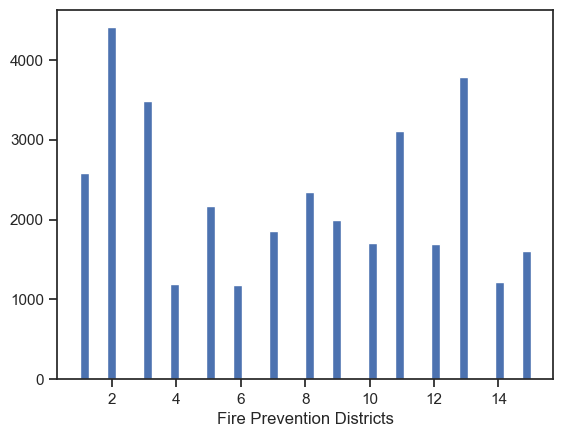

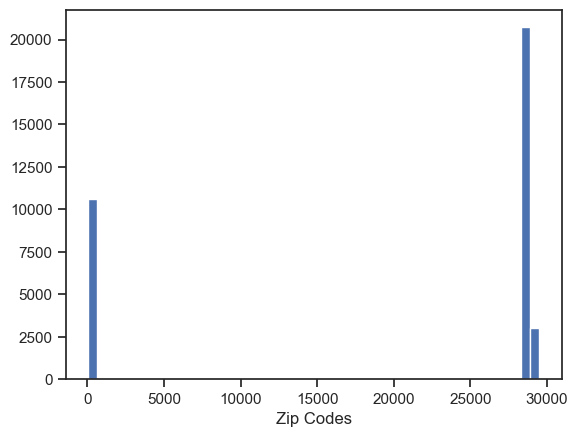

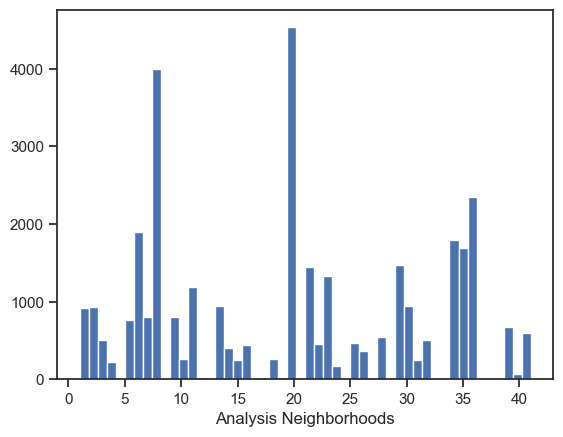

In [9]:
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

Для обработки пропусков возьмем колонку Neighborhoods (old). Заметим, что данные распредлены волнами, поэтому для обработки будем использовать более сложную функцию, которая позволяет задавать колонку и вид импьютации

In [10]:
strategies=['mean', 'median', 'most_frequent'] 

In [11]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [12]:
test_num_impute_col(df, 'Neighborhoods (old)', strategies[0])

('Neighborhoods (old)', 'mean', 19594, 19.048052590244044, 19.048052590244044)

In [13]:
test_num_impute_col(df, 'Neighborhoods (old)', strategies[1])

('Neighborhoods (old)', 'median', 19594, 19.0, 19.0)

In [14]:
test_num_impute_col(df, 'Neighborhoods (old)', strategies[2])

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


('Neighborhoods (old)', 'most_frequent', 19594, 19.0, 19.0)

Заметим, что стратегии распределились одинаково, что было заметно и на графике, поэтому заполним пропуски медианой

In [15]:
df['Neighborhoods (old)'] = df['Neighborhoods (old)'].fillna(df['Neighborhoods (old)'].median())

In [16]:
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and dt=='object' :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_postal_code. Тип данных object. Количество пустых значений 1018, 1.89%.
Колонка business_location. Тип данных object. Количество пустых значений 19556, 36.23%.
Колонка violation_id. Тип данных object. Количество пустых значений 12870, 23.85%.
Колонка violation_description. Тип данных object. Количество пустых значений 12870, 23.85%.
Колонка risk_category. Тип данных object. Количество пустых значений 12870, 23.85%.


In [17]:
df_num = df[num_cols]
df_num

,business_postal_code,business_location,violation_id,violation_description,risk_category
0,NaN,NaN,NaN,NaN,NaN
1,94118,NaN,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,94110,NaN,NaN,NaN,NaN
3,94111,NaN,NaN,NaN,NaN
4,94109,NaN,85986_20161011_103114,High risk vermin infestation,High Risk
...,...,...,...,...,...
53968,94107,NaN,89569_20190506_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
53969,94132,NaN,NaN,NaN,NaN
53970,94105,NaN,84541_20190506_103133,Foods not protected from contamination,Moderate Risk
53971,94112,NaN,91572_20190506_103116,Inadequate food safety knowledge or lack of ce...,Moderate Risk


In [18]:
cat_temp_data = df[['risk_category']]
cat_temp_data.head()

,risk_category
0,NaN
1,Moderate Risk
2,NaN
3,NaN
4,High Risk


In [19]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Low Risk'],
       ['Moderate Risk'],
       ['Low Risk'],
       ...,
       ['Moderate Risk'],
       ['Moderate Risk'],
       ['Low Risk']], dtype=object)

In [20]:
np.unique(data_imp2)

array(['High Risk', 'Low Risk', 'Moderate Risk'], dtype=object)

In [22]:
col = ['High Risk', 'Low Risk', 'Moderate Risk']
for i in col: 
    k = data_imp2[data_imp2==i].size
    print('Количество вхожденией по {} равно {}'.format(i, k))

Количество вхожденией по High Risk равно 5983
Количество вхожденией по Low Risk равно 32375
Количество вхожденией по Moderate Risk равно 15615


In [23]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Low Risk')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Low Risk'],
       ['Moderate Risk'],
       ['Low Risk'],
       ...,
       ['Moderate Risk'],
       ['Moderate Risk'],
       ['Low Risk']], dtype=object)

Так количество пропусков > 10%, поэтому не до конца логично будет заполнять их самой встречающейся категорией, тк в дольнейшем это может исказить реальную картину данных, поэтому заполним пропуски Unknown

In [24]:
df['risk_category']= df['risk_category'].fillna('unk')